In [150]:
import boto3
import pandas as pd
import numpy as np
import io
from io import StringIO
from sklearn.preprocessing import normalize
import skbio.diversity
from skbio.diversity import alpha_diversity
from skbio.diversity import beta_diversity
from skbio import TreeNode
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px




In [2]:
s3 = boto3.resource('s3')
S3_client = boto3.client('s3')
bucket = "siwamicrobiome"
bucket_s3= s3.Bucket(bucket)

In [3]:
tax_obj = S3_client.get_object(Bucket=bucket, Key="exports/20220930/20220930.taxonomy_processed.csv")
tax_data = tax_obj['Body'].read()
tax_df = pd.read_csv(io.BytesIO(tax_data), sep=',')
tax_df

,Kingdom,Phylum,Class,Order,Family,Genus,Species,OTU,SciName
0,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,UNKNOWN,45d4fe3f6c01f77c2dfc11dd91d3359a,Lactobacillus UNKNOWN
1,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,UNKNOWN,0df6c802966e8670279671824da4f10a,Lactobacillus UNKNOWN
2,Bacteria,Firmicutes,Bacilli,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,2ef1e51ab1cf99a3c6417b05a060830e,UNKNOWN UNKNOWN
3,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium_sensu_stricto_1,UNKNOWN,40874d61006874f7c87d904707d320d9,Clostridium_sensu_stricto_1 UNKNOWN
4,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,Blautia,UNKNOWN,c6c3ab4e828fb40d6e05967b7aac9338,Blautia UNKNOWN
...,...,...,...,...,...,...,...,...,...
5221,Bacteria,Firmicutes,Clostridia,Oscillospirales,Ruminococcaceae,Fournierella,UNKNOWN,1fe38d3fa527f5c654a6174fd0cbe4da,Fournierella UNKNOWN
5222,Bacteria,Proteobacteria,Alphaproteobacteria,Rickettsiales,UNKNOWN,UNKNOWN,UNKNOWN,91a676270efe06b60abc00f2fb48d116,UNKNOWN UNKNOWN
5223,Bacteria,Proteobacteria,Alphaproteobacteria,Reyranellales,Reyranellaceae,Reyranella,UNKNOWN,74b1cce8fa53b00167441931bea43cf3,Reyranella UNKNOWN
5224,Bacteria,Actinobacteriota,Actinobacteria,Corynebacteriales,Corynebacteriaceae,Corynebacterium,UNKNOWN,5ebe9750649a36dac2a6bca59672e870,Corynebacterium UNKNOWN


In [4]:
otu_obj = S3_client.get_object(Bucket=bucket, Key='exports/20220930/20220930.feature-table.tsv')
otu_data = otu_obj['Body'].read()
otu_df = pd.read_csv(io.BytesIO(otu_data), sep='\t')
otu_df

,0087_01F-M,0087_02F-M,0087_03F-M,0087_04F-M,0087_05F-M,0087_06F-M,0088_01F-M,0088_02F-M,0088_03F-M,0088_04F-M,...,C120_04C-M,C120_05C-M,C120_06C-M,C124_01F-M,C124_02F-M,C124_03F-M,C124_04F-M,C124_05F-M,C124_06F-M,OTU
0,384.0,92.0,71.0,61.0,106.0,75.0,104.0,1711.0,187.0,574.0,...,1622.0,112.0,164.0,368.0,1073.0,109.0,168.0,534.0,4384.0,45d4fe3f6c01f77c2dfc11dd91d3359a
1,70.0,276.0,67.0,482.0,929.0,72.0,73.0,174.0,75.0,304.0,...,352.0,47.0,81.0,231.0,160.0,78.0,476.0,7129.0,631.0,0df6c802966e8670279671824da4f10a
2,382.0,882.0,92.0,494.0,2126.0,109.0,1251.0,1394.0,129.0,359.0,...,155.0,227.0,176.0,481.0,3125.0,253.0,1881.0,4869.0,336.0,2ef1e51ab1cf99a3c6417b05a060830e
3,35.0,43.0,73.0,60.0,35.0,48.0,48.0,323.0,270.0,54.0,...,93.0,118.0,79.0,244.0,97.0,60.0,135.0,1035.0,199.0,40874d61006874f7c87d904707d320d9
4,1245.0,88.0,665.0,450.0,436.0,754.0,1914.0,535.0,377.0,2406.0,...,45.0,34.0,44.0,123.0,44.0,54.0,42.0,228.0,66.0,c6c3ab4e828fb40d6e05967b7aac9338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1fe38d3fa527f5c654a6174fd0cbe4da
5222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,91a676270efe06b60abc00f2fb48d116
5223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,74b1cce8fa53b00167441931bea43cf3
5224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5ebe9750649a36dac2a6bca59672e870


In [5]:
meta_obj = S3_client.get_object(Bucket=bucket, Key='exports/20220930/20220930.mapfile_alpha.csv')
meta_data = meta_obj['Body'].read()
meta_df = pd.read_csv(io.BytesIO(meta_data))
meta_df

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,Project,Client,Pen,House,LinkerPrimerSequence,BarcodePlate,Well,Description,Alfa_Shannon,Alfa_Observed
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,E347,Iluma,6.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A1,0115_01C-M,5.570814,101
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,E347,Iluma,28.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A2,0115_02C-M,4.892334,74
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,E347,Iluma,14.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A3,0115_03C-M,4.746524,103
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,E347,Iluma,40.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A4,0115_04C-M,5.758773,118
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,E347,Iluma,2.0,3.0,GTGTGYCAGCMGCCGCGGTAA,13,A5,0116_05C-M,4.503650,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,C116_06I-M,CTTGTTGTTCTG,C116,2.0,Na0.16CI0.25,42.0,6.0,I,M,Broiler,C1,Iluma,27.0,3.0,GTGTGYCAGCMGCCGCGGTAA,18,B10,0116_06I-M_96,4.133520,131
350,C119_02I-M,GGATGTCTTCGC,C119,5.0,Na0.34CI0.25,42.0,2.0,I,M,Broiler,C1,Iluma,26.0,1.0,GTGTGYCAGCMGCCGCGGTAA,18,B12,0119_02I-M_96,1.530244,30
351,C119_03I-M,CGTGTCCGTGTC,C119,5.0,Na0.34CI0.25,42.0,3.0,I,M,Broiler,C1,Iluma,17.0,2.0,GTGTGYCAGCMGCCGCGGTAA,18,C1,0119_03I-M_96,5.679060,194
352,C119_04I-M,CTTGGTAGTGCC,C119,5.0,Na0.34CI0.25,42.0,4.0,I,M,Broiler,C1,Iluma,38.0,2.0,GTGTGYCAGCMGCCGCGGTAA,18,C2,0119_04I-M_96,2.709722,42


In [6]:
def get_dict_level(Nivel, TaxaDataframe):
    """
    Retorna un diccionario. Las claves son los nombres únicos de los taxones para ese nivel y los valores son listas de los OTUs asociados a ese nombre.
    TaxaDataframe debe tener una columna llamada 'OTU'.
    
    Parámetros:
    - Nivel: El nivel taxonómico de interés (por ejemplo, 'Género', 'Familia').
    - TaxaDataframe: El DataFrame que contiene datos taxonómicos. Debe tener una columna 'OTU'.
    """
    # Obtiene los nombres únicos de los taxones para el nivel taxonómico especificado
    nombres_unicos = list(TaxaDataframe[Nivel].unique())
    
    # Crea un diccionario donde las claves son nombres de taxones y los valores son listas de OTUs para ese nombre
    dict_nivel_otus = dict(
        zip(
            nombres_unicos,
            [
                list(set(TaxaDataframe[TaxaDataframe[Nivel] == i].OTU))
                for i in nombres_unicos
            ],
        )
    )
    
    return dict_nivel_otus


In [7]:
def get_experiment(META, DF, TAXA, ExperimentID):
    """
    Obtén los DataFrames para el experimento en el mismo orden que la entrada.
    La columna 'Project' en df_meta se utiliza para filtrar el experimento.

    Parámetros:
    - META: DataFrame que contiene metadatos.
    - DF: DataFrame que contiene datos de microbioma.
    - TAXA: DataFrame que contiene información taxonómica.
    - ExperimentID: Identificador del experimento a seleccionar.

    Retorna:
    Una lista con tres DataFrames en el siguiente orden: meta_experiment, DF_subset, TAXA_subset.
    """
    # Filtra los metadatos para obtener solo las muestras del experimento especificado
    meta_experiment = META[META.Project == ExperimentID]
    
    # Imprime el número de muestras para ese experimento
    print("Número de muestras para ese experimento {}".format(meta_experiment.shape[0]))
    
    # Obtiene las muestras que tienen datos de microbioma en DF
    samples = list(meta_experiment.SampleID)
    samples = [i for i in samples if i in DF.columns]
    
    # Imprime el número de muestras con microbioma
    print("Número de muestras con microbioma {}".format(len(samples)))
    
    # Verifica duplicados en las muestras y añade la columna 'OTU'
    if not meta_experiment[meta_experiment.duplicated(subset=["SampleID"])].shape[0] > 0:
        samples.append("OTU")
        
        # Selecciona las columnas correspondientes a las muestras y 'OTU'
        DF_subset = DF[samples]
        
        # Imprime la forma total del subconjunto de OTUs
        print("Forma total del subconjunto de OTUs {}".format(DF_subset.shape))
        
        # Elimina las filas con recuentos de cero
        DF_subset = DF_subset[DF_subset.drop("OTU", axis=1).sum(axis=1) >= 1]
        
        # Imprime la forma después de eliminar recuentos de cero
        print("Después de eliminar recuentos de cero {}".format(DF_subset.shape))
        
        # Filtra TAXA para mantener solo las filas con OTUs presentes en DF_subset
        TAXA_subset = TAXA[TAXA.OTU.isin(list(DF_subset.OTU))]
        
        # Imprime el tamaño de TAXA_subset
        print("Tamaño de TAXA_subset {}".format(TAXA_subset.shape))
        
        # Retorna una lista con los DataFrames obtenidos
        return [meta_experiment, DF_subset, TAXA_subset]
    else:
        # Imprime un mensaje si hay duplicados
        print("OJO: ¡DUPLICADOS!")


In [8]:
def convert_relative(otus_table_df):
    """
    Convierte una tabla de OTUs en valores relativos (porcentaje).

    Parámetros:
    - otus_table_df: DataFrame que contiene datos de OTUs. Debe tener 'OTU' como columna.

    Retorna:
    DataFrame normalizado con valores relativos, donde las OTUs son índices.
    """
    # Rellena los valores NaN con ceros
    otus_table_df = otus_table_df.fillna(0)
    
    # Establece las OTUs como índices
    otus = list(otus_table_df.OTU)
    otus_table_df.index = otus
    
    # Elimina la columna 'OTU'
    otus_table_df = otus_table_df.drop("OTU", axis=1)
    
    # Obtiene la lista de nombres de muestras
    samples = list(otus_table_df.columns)
    
    # Normaliza los valores relativos
    df_norm = pd.DataFrame(normalize(otus_table_df.values.T, axis=1, norm="l1").T)
    
    # Establece las columnas y los índices del DataFrame normalizado
    df_norm.columns = samples
    df_norm.index = otus
    
    # Imprime un mensaje
    print("Las OTUs son el índice")
    
    # Retorna el DataFrame normalizado
    return df_norm


In [9]:
def aggregate_taxa(Level, TaxaDataframe, OTUDataframe):
    """
    Agrega las OTUs a nivel de taxonomía especificado.

    Parámetros:
    - Level: Nivel taxonómico al que se desea agregar (por ejemplo, "Phylum").
    - TaxaDataframe: DataFrame que contiene datos de taxonomía. Debe tener 'OTU' como columna.
    - OTUDataframe: DataFrame que contiene datos de OTUs. Debe tener las OTUs como ÍNDICE, no como columna.

    Retorna:
    DataFrame con las OTUs agregadas a nivel del taxón especificado.
    """
    # Obtiene un diccionario con las OTUs para cada categoría en el nivel especificado
    dict_agg = get_dict_level(Level, TaxaDataframe)
    
    # Crea un DataFrame a partir del diccionario, sumando las OTUs para cada categoría
    result_df = pd.DataFrame.from_dict(
        {
            key: list(
                OTUDataframe.loc[
                    dict_agg[key],
                ].sum(axis=0, skipna=True)
            )
            for key in dict_agg.keys()
        },
        orient="index",
        columns=OTUDataframe.columns,
    )
    
    # Retorna el DataFrame resultante
    return result_df


In [10]:
def ratio1(
    df_otus,
    df_taxa,
    level="Genus",
    taxas=["Lactobacillus", "Escherichia-Shigella"],
    indexname="ratio1",
):
    """Ratio and log of ratio between two taxas of the same taxonomy level."""
    if taxas[0] in df_taxa[level].unique() and taxas[1] in df_taxa[level].unique():
        dfRelative = convert_relative(df_otus)
        df_agg = aggregate_taxa(level, df_taxa, dfRelative)
        df_taxa0_taxa1 = df_agg.loc[
            taxas,
        ]
        taxa_den = taxas[1]
        taxa_num = taxas[0]
        min_deno = np.min(df_taxa0_taxa1.loc[taxa_den])
        min_num = np.min(df_taxa0_taxa1.loc[taxa_num])
        if min_deno == 0:  ### Corregir denominador cero
            print("Corregir denominador")
            samples_zero_den = list(
                df_taxa0_taxa1.columns[df_taxa0_taxa1.loc[taxa_den] == min_deno]
            )
            second_last_den = [
                i for i in sorted(df_taxa0_taxa1.loc[taxa_den]) if i != 0
            ][0]
            # print(second_last_den)
            df_taxa0_taxa1.loc[taxa_den, samples_zero_den] = second_last_den
        if min_num == 0:  ### Corregir denominador cero
            print("Corregir numerador")
            samples_zero_num = list(
                df_taxa0_taxa1.columns[df_taxa0_taxa1.loc[taxa_num] == min_num]
            )
            second_last_num = [
                i for i in sorted(df_taxa0_taxa1.loc[taxa_num]) if i != 0
            ][0]
            # print(second_last_num)
            df_taxa0_taxa1.loc[taxa_num, samples_zero_num] = second_last_num

        df_taxa0_taxa1.loc[indexname] = (
            df_taxa0_taxa1.loc[taxas[0]] / df_taxa0_taxa1.loc[taxas[1]]
        )
        df_taxa0_taxa1.loc["{}LOG".format(indexname)] = df_taxa0_taxa1.loc[
            indexname
        ].apply(lambda x: np.log(x))
        return df_taxa0_taxa1
    else:
        print("At least one taxa not found in {} level.".format(level))
        return None


In [11]:
def ratio3(df_otus, df_taxa, level="Genus", taxa="Lactobacillus"):
    """One taxa vs others."""
    if taxa in df_taxa[level].unique():
        dfRelative = convert_relative(df_otus)
        df_agg = aggregate_taxa(level, df_taxa, dfRelative)
        series_taxa = df_agg.loc[
            taxa,
        ]
        series_rest = (
            df_agg.loc[
                df_agg.index != taxa,
            ]
            .sum(axis=0, skipna=True)
            .rename("Others")
        )
        df_ratio3 = pd.concat([series_taxa, series_rest], axis=1).T
        min_num = np.min(df_ratio3.loc[taxa])
        if min_num == 0:  ### Corregir denominador cero
            print("Corregir numerador")
            samples_zero_num = list(df_ratio3.columns[df_ratio3.loc[taxa] == min_num])
            second_last_num = [i for i in sorted(df_ratio3.loc[taxa]) if i != 0][0]
            print(second_last_num)
            df_ratio3.loc[taxa, samples_zero_num] = second_last_num
        df_ratio3.loc["ratio3"] = df_ratio3.loc[taxa] / df_ratio3.loc["Others"]
        df_ratio3.loc["ratio3LOG"] = df_ratio3.loc["ratio3"].apply(lambda x: np.log(x))

        return df_ratio3
    else:
        print("Taxa not found in {} level.".format(level))
        return None


In [12]:
otu_df.columns
meta_df[meta_df.Project == "E347"]

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,Project,Client,Pen,House,LinkerPrimerSequence,BarcodePlate,Well,Description,Alfa_Shannon,Alfa_Observed
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,E347,Iluma,6.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A1,0115_01C-M,5.570814,101
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,E347,Iluma,28.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A2,0115_02C-M,4.892334,74
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,E347,Iluma,14.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A3,0115_03C-M,4.746524,103
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,E347,Iluma,40.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A4,0115_04C-M,5.758773,118
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,E347,Iluma,2.0,3.0,GTGTGYCAGCMGCCGCGGTAA,13,A5,0116_05C-M,4.503650,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0124_02I-M,TACATATCTACA,124,10.0,Na0.40CI0.71,42.0,2.0,I,M,Broiler,E347,Iluma,23.0,1.0,GTGTGYCAGCMGCCGCGGTAA,15,G8,0124_02I-M,2.896228,57
175,0124_03I-M,TCTAGGTTATTC,124,10.0,Na0.40CI0.71,42.0,3.0,I,M,Broiler,E347,Iluma,13.0,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G9,0124_03I-M,2.716216,57
176,0124_04I-M,TGTCTACATACT,124,10.0,Na0.40CI0.71,42.0,4.0,I,M,Broiler,E347,Iluma,30.0,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G10,0124_04I-M,2.687629,62
177,0124_05I-M,GCCGCTCTTTGG,124,10.0,Na0.40CI0.71,42.0,5.0,I,M,Broiler,E347,Iluma,10.0,3.0,GTGTGYCAGCMGCCGCGGTAA,15,G11,0124_05I-M,2.173903,13


In [13]:
list_exp = get_experiment(meta_df, otu_df, tax_df, "E347")

Número de muestras para ese experimento 179
Número de muestras con microbioma 179
Forma total del subconjunto de OTUs (5226, 180)
Después de eliminar recuentos de cero (1977, 180)
Tamaño de TAXA_subset (1977, 9)


In [14]:
list_exp[0].to_csv("data/metadata_E347.csv", header=True, index=False)
list_exp[1].to_csv("data/otus_E347.csv", header=True, index=False)
list_exp[2].to_csv("data/taxonomy_E347.csv", header=True, index=False)

In [15]:
TAXA = list_exp[2]
OTUS = list_exp[1]
df_ratio1 = ratio1(OTUS, TAXA)
df_ratio2 = ratio1(OTUS, TAXA, level="Phylum", taxas=["Firmicutes", "Proteobacteria"], indexname="ratio2")
df_ratio3 = ratio3(OTUS, TAXA)

Las OTUs son el índice


Corregir denominador
Las OTUs son el índice
Corregir denominador
Las OTUs son el índice


In [16]:
df_123 = pd.concat([df_ratio1,df_ratio2, df_ratio3], axis=0).loc[["ratio1LOG", "ratio2LOG", "ratio3LOG"]]
df_123 = df_123.transpose()
df_123["SampleID"] = df_123.index
df_123.head()

,ratio1LOG,ratio2LOG,ratio3LOG,SampleID
0115_01C-M,1.618213,3.106179,-1.445178,0115_01C-M
0115_02C-M,2.716784,2.769024,-0.474775,0115_02C-M
0115_03C-M,0.110712,2.805703,-3.940691,0115_03C-M
0115_04C-M,0.583749,1.224999,-3.193350,0115_04C-M
0116_05C-M,0.987387,4.716264,-4.531123,0116_05C-M


In [17]:
df_metadata = list_exp[0]
df_metadata = pd.merge(
        left=df_metadata,
        right=df_123,
        how="left",
        on="SampleID",copy=False
    )
df_metadata.head()
df_metadata.to_csv("data/metadata_E347.csv", header=True, index=False)

In [18]:
df_metadata

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,...,House,LinkerPrimerSequence,BarcodePlate,Well,Description,Alfa_Shannon,Alfa_Observed,ratio1LOG,ratio2LOG,ratio3LOG
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,...,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A1,0115_01C-M,5.570814,101,1.618213,3.106179,-1.445178
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,...,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A2,0115_02C-M,4.892334,74,2.716784,2.769024,-0.474775
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A3,0115_03C-M,4.746524,103,0.110712,2.805703,-3.940691
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A4,0115_04C-M,5.758773,118,0.583749,1.224999,-3.193350
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,...,3.0,GTGTGYCAGCMGCCGCGGTAA,13,A5,0116_05C-M,4.503650,69,0.987387,4.716264,-4.531123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0124_02I-M,TACATATCTACA,124,10.0,Na0.40CI0.71,42.0,2.0,I,M,Broiler,...,1.0,GTGTGYCAGCMGCCGCGGTAA,15,G8,0124_02I-M,2.896228,57,5.019363,5.244012,-0.263935
175,0124_03I-M,TCTAGGTTATTC,124,10.0,Na0.40CI0.71,42.0,3.0,I,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G9,0124_03I-M,2.716216,57,-2.257514,-0.880712,-2.731836
176,0124_04I-M,TGTCTACATACT,124,10.0,Na0.40CI0.71,42.0,4.0,I,M,Broiler,...,2.0,GTGTGYCAGCMGCCGCGGTAA,15,G10,0124_04I-M,2.687629,62,4.711114,4.734802,0.692398
177,0124_05I-M,GCCGCTCTTTGG,124,10.0,Na0.40CI0.71,42.0,5.0,I,M,Broiler,...,3.0,GTGTGYCAGCMGCCGCGGTAA,15,G11,0124_05I-M,2.173903,13,6.891672,7.609720,0.135025


C:\Users\jmontoyas\AppData\Local\Temp\ipykernel_5544\1695823635.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SampleLocation', y='Alfa_Shannon', data=df, palette=palette, linewidth=2)


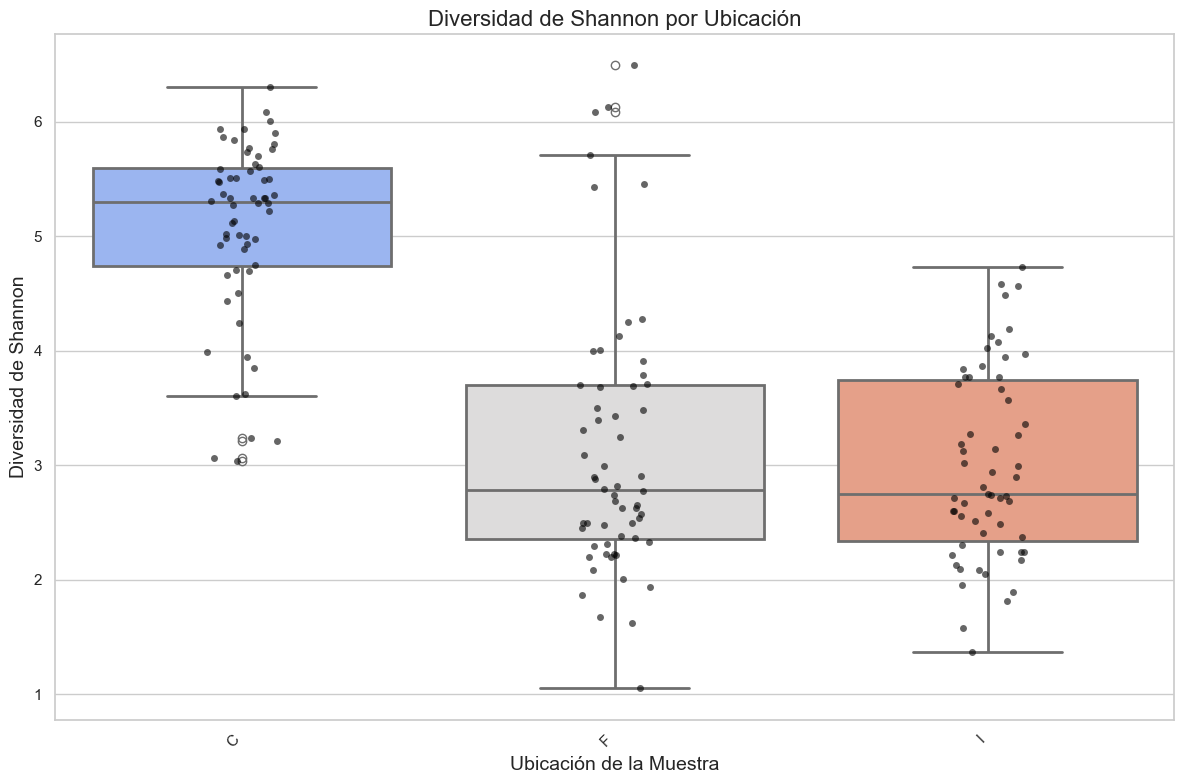

C:\Users\jmontoyas\AppData\Local\Temp\ipykernel_5544\1695823635.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SampleLocation', y='Alfa_Observed', data=df, palette=palette, linewidth=2)


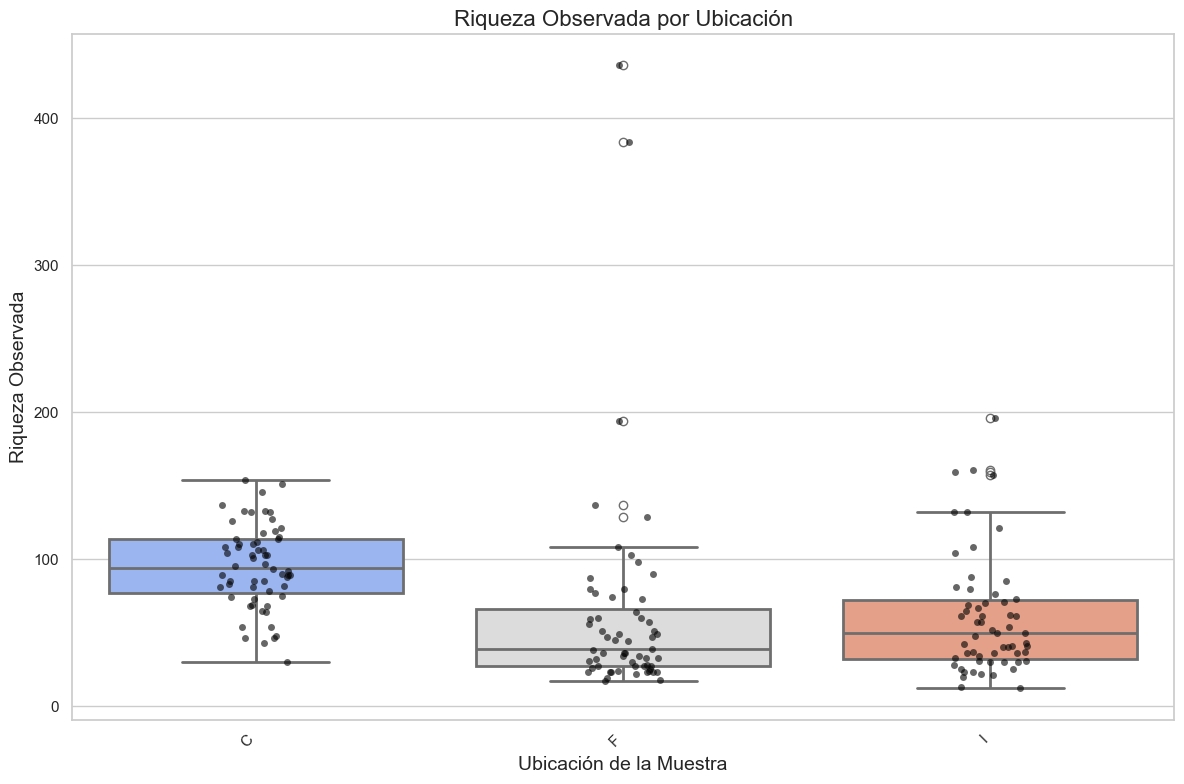

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/metadata_E347.csv')

# Configuración estética de seaborn
sns.set(style="whitegrid")

# Mejorando la paleta de colores
palette = sns.color_palette("coolwarm", n_colors=len(df['SampleLocation'].unique()))

# Boxplot para Alfa_Shannon
plt.figure(figsize=(12, 8))
sns.boxplot(x='SampleLocation', y='Alfa_Shannon', data=df, palette=palette, linewidth=2)
sns.stripplot(x='SampleLocation', y='Alfa_Shannon', data=df, color='black', jitter=True, alpha=0.6)
plt.title('Diversidad de Shannon por Ubicación', fontsize=16)
plt.xlabel('Ubicación de la Muestra', fontsize=14)
plt.ylabel('Diversidad de Shannon', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Boxplot para Alfa_Observed
plt.figure(figsize=(12, 8))
sns.boxplot(x='SampleLocation', y='Alfa_Observed', data=df, palette=palette, linewidth=2)
sns.stripplot(x='SampleLocation', y='Alfa_Observed', data=df, color='black', jitter=True, alpha=0.6)
plt.title('Riqueza Observada por Ubicación', fontsize=16)
plt.xlabel('Ubicación de la Muestra', fontsize=14)
plt.ylabel('Riqueza Observada', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
df.columns

Index(['SampleID', 'BarcodeSequence', 'KitID', 'TreatmentNumber', 'Treatment',
       'Age', 'AnimalNumber', 'SampleLocation', 'AnalysisType', 'AnimalType',
       'Project', 'Client', 'Pen', 'House', 'LinkerPrimerSequence',
       'BarcodePlate', 'Well', 'Description', 'Alfa_Shannon', 'Alfa_Observed',
       'ratio1LOG', 'ratio2LOG', 'ratio3LOG'],
      dtype='object')

C:\Users\jmontoyas\AppData\Local\Temp\ipykernel_5544\665496043.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diversity_cols[['Alfa_Shannon', 'Alfa_Observed']] = diversity_cols[['Alfa_Shannon', 'Alfa_Observed']].apply(pd.to_numeric, errors='coerce')


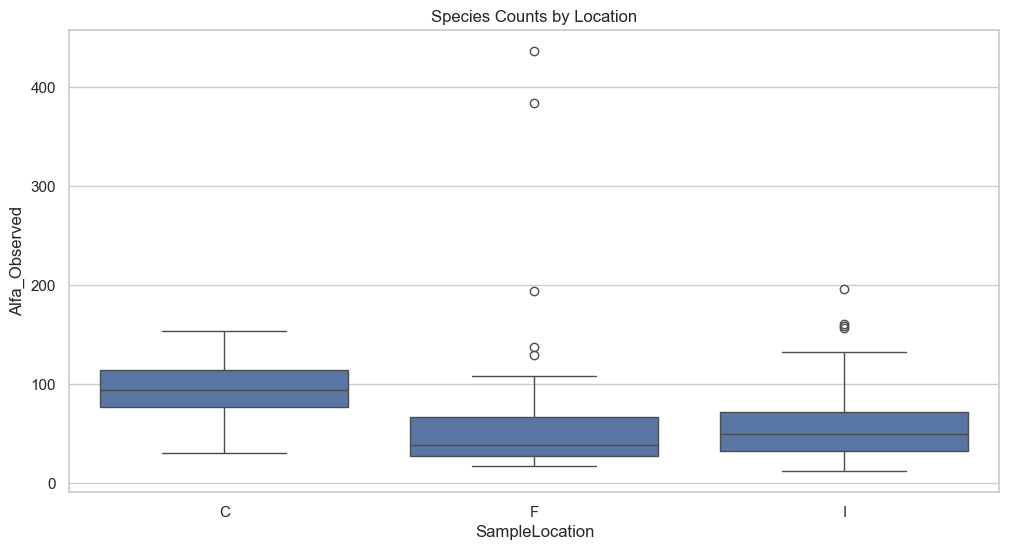

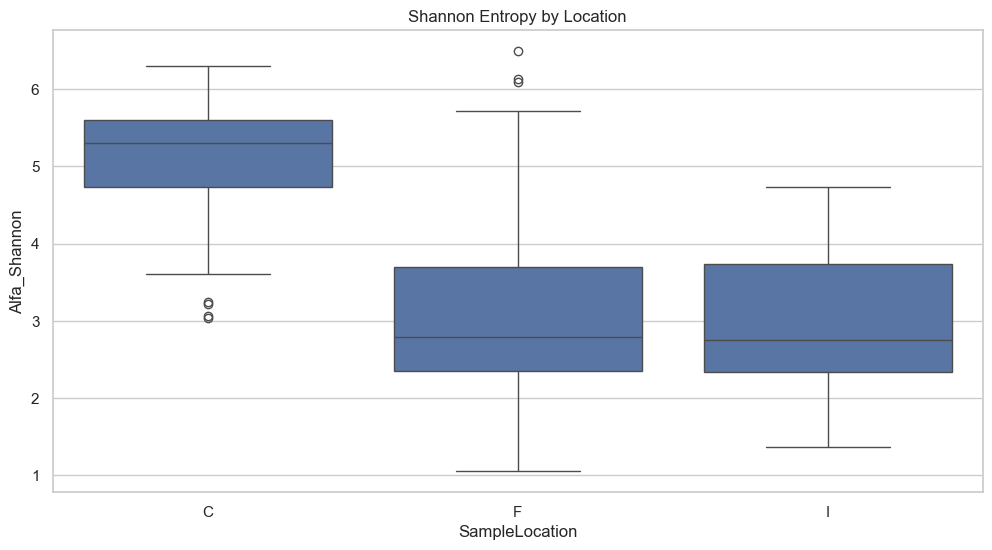

In [21]:
import pandas as pd
import skbio
import matplotlib.pyplot as plt
import seaborn as sns

diversity_cols = df[['Alfa_Shannon', 'Alfa_Observed', 'SampleLocation']]

# Convierte las columnas a tipo numérico
diversity_cols[['Alfa_Shannon', 'Alfa_Observed']] = diversity_cols[['Alfa_Shannon', 'Alfa_Observed']].apply(pd.to_numeric, errors='coerce')

# Calcula la riqueza de especies y el índice de Shannon para cada muestra
species_counts = diversity_cols.groupby('SampleLocation')['Alfa_Observed'].mean().reset_index(name='MeanSpeciesCounts')

shannon_entropy = diversity_cols.groupby('SampleLocation')['Alfa_Shannon'].mean().reset_index(name='MeanShannonEntropy')

# Visualización en boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='SampleLocation', y='Alfa_Observed', data=diversity_cols)
plt.title('Species Counts by Location')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='SampleLocation', y='Alfa_Shannon', data=diversity_cols)
plt.title('Shannon Entropy by Location')
plt.show()


c:\Users\jmontoyas\Desktop\SIWAProject\.venv\Lib\site-packages\skbio\diversity\alpha\_base.py:869: RuntimeWarning: invalid value encountered in divide
  freqs = counts / counts.sum()


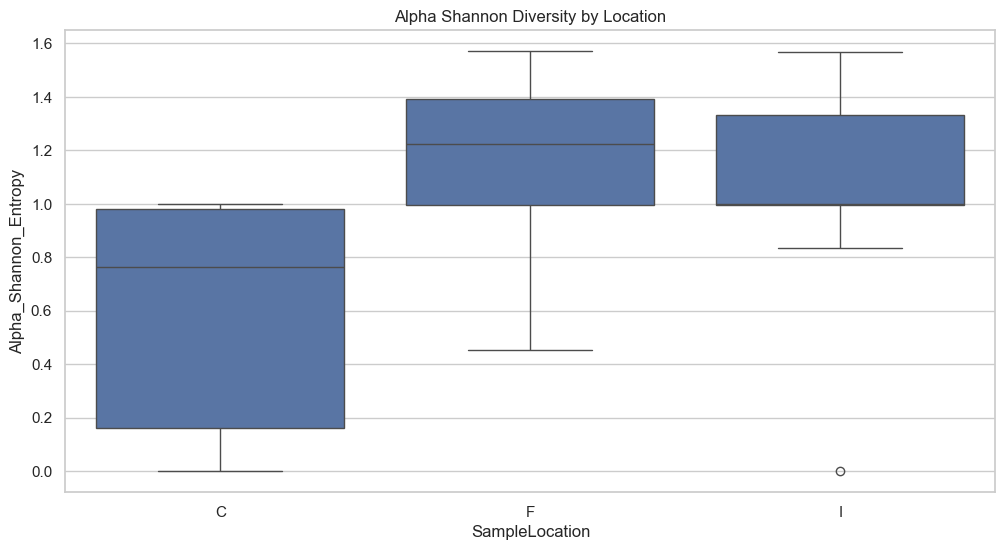

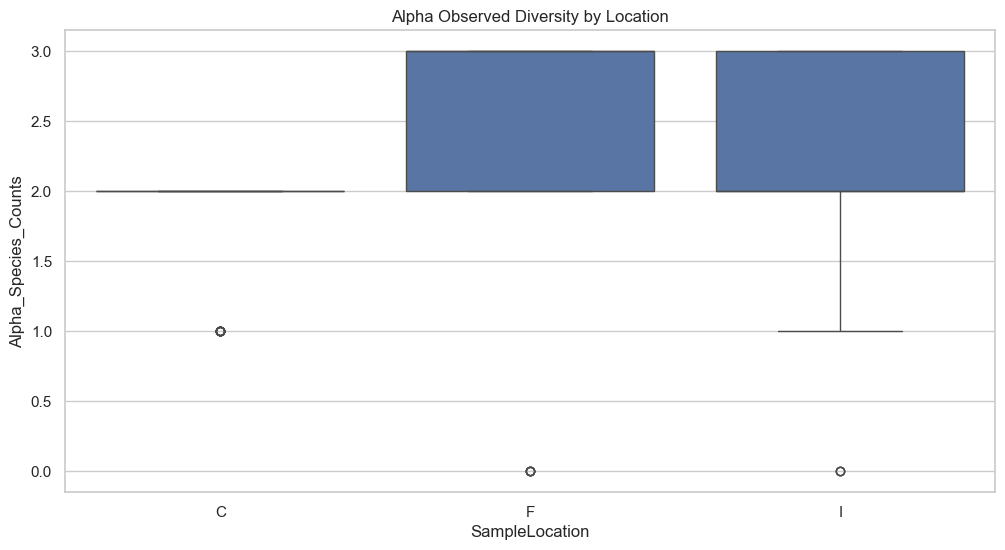

In [22]:
import pandas as pd
import skbio
import matplotlib.pyplot as plt
import seaborn as sns



diversity_cols = df[['SampleLocation', 'ratio1LOG', 'ratio2LOG', 'ratio3LOG']]

# Convierte las columnas numéricas a tipo numérico
diversity_cols.iloc[:, 1:] = diversity_cols.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Asegúrate de que no haya valores negativos en las columnas
diversity_cols.iloc[:, 1:] = diversity_cols.iloc[:, 1:].clip(lower=0)

# Calcula la riqueza de especies para cada muestra
species_counts = diversity_cols.iloc[:, 1:].apply(lambda x: skbio.diversity.alpha.observed_otus(x), axis=1)

# Calcula el índice de Shannon para cada muestra
shannon_entropy = diversity_cols.iloc[:, 1:].apply(lambda x: skbio.diversity.alpha.shannon(x), axis=1)

# Agrega los resultados al DataFrame
df['Alpha_Species_Counts'] = species_counts
df['Alpha_Shannon_Entropy'] = shannon_entropy

# Visualizamos la distribución de Alpha Shannon por ubicación
plt.figure(figsize=(12, 6))
sns.boxplot(x='SampleLocation', y='Alpha_Shannon_Entropy', data=df)
plt.title('Alpha Shannon Diversity by Location')
plt.show()

# Visualizamos la distribución de Alpha Observed por ubicación
plt.figure(figsize=(12, 6))
sns.boxplot(x='SampleLocation', y='Alpha_Species_Counts', data=df)
plt.title('Alpha Observed Diversity by Location')
plt.show()


In [23]:
diversity_cols

,SampleLocation,ratio1LOG,ratio2LOG,ratio3LOG
0,C,1.618213,3.106179,0.000000
1,C,2.716784,2.769024,0.000000
2,C,0.110712,2.805703,0.000000
3,C,0.583749,1.224999,0.000000
4,C,0.987387,4.716264,0.000000
...,...,...,...,...
174,I,5.019363,5.244012,0.000000
175,I,0.000000,0.000000,0.000000
176,I,4.711114,4.734802,0.692398
177,I,6.891672,7.609720,0.135025


In [24]:
df

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,...,BarcodePlate,Well,Description,Alfa_Shannon,Alfa_Observed,ratio1LOG,ratio2LOG,ratio3LOG,Alpha_Species_Counts,Alpha_Shannon_Entropy
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,...,13,A1,0115_01C-M,5.570814,101,1.618213,3.106179,-1.445178,2,0.927213
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,...,13,A2,0115_02C-M,4.892334,74,2.716784,2.769024,-0.474775,2,0.999935
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,...,13,A3,0115_03C-M,4.746524,103,0.110712,2.805703,-3.940691,2,0.232867
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,...,13,A4,0115_04C-M,5.758773,118,0.583749,1.224999,-3.193350,2,0.907332
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,...,13,A5,0116_05C-M,4.503650,69,0.987387,4.716264,-4.531123,2,0.664781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0124_02I-M,TACATATCTACA,124,10.0,Na0.40CI0.71,42.0,2.0,I,M,Broiler,...,15,G8,0124_02I-M,2.896228,57,5.019363,5.244012,-0.263935,2,0.999654
175,0124_03I-M,TCTAGGTTATTC,124,10.0,Na0.40CI0.71,42.0,3.0,I,M,Broiler,...,15,G9,0124_03I-M,2.716216,57,-2.257514,-0.880712,-2.731836,0,NaN
176,0124_04I-M,TGTCTACATACT,124,10.0,Na0.40CI0.71,42.0,4.0,I,M,Broiler,...,15,G10,0124_04I-M,2.687629,62,4.711114,4.734802,0.692398,3,1.291230
177,0124_05I-M,GCCGCTCTTTGG,124,10.0,Na0.40CI0.71,42.0,5.0,I,M,Broiler,...,15,G11,0124_05I-M,2.173903,13,6.891672,7.609720,0.135025,3,1.064634


In [39]:
meta_df_calculate = meta_df.copy()
meta_df_calculate = meta_df_calculate[meta_df_calculate.columns[:-2]]
meta_df_calculate

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,Project,Client,Pen,House,LinkerPrimerSequence,BarcodePlate,Well,Description
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,E347,Iluma,6.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A1,0115_01C-M
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,E347,Iluma,28.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A2,0115_02C-M
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,E347,Iluma,14.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A3,0115_03C-M
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,E347,Iluma,40.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A4,0115_04C-M
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,E347,Iluma,2.0,3.0,GTGTGYCAGCMGCCGCGGTAA,13,A5,0116_05C-M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,C116_06I-M,CTTGTTGTTCTG,C116,2.0,Na0.16CI0.25,42.0,6.0,I,M,Broiler,C1,Iluma,27.0,3.0,GTGTGYCAGCMGCCGCGGTAA,18,B10,0116_06I-M_96
350,C119_02I-M,GGATGTCTTCGC,C119,5.0,Na0.34CI0.25,42.0,2.0,I,M,Broiler,C1,Iluma,26.0,1.0,GTGTGYCAGCMGCCGCGGTAA,18,B12,0119_02I-M_96
351,C119_03I-M,CGTGTCCGTGTC,C119,5.0,Na0.34CI0.25,42.0,3.0,I,M,Broiler,C1,Iluma,17.0,2.0,GTGTGYCAGCMGCCGCGGTAA,18,C1,0119_03I-M_96
352,C119_04I-M,CTTGGTAGTGCC,C119,5.0,Na0.34CI0.25,42.0,4.0,I,M,Broiler,C1,Iluma,38.0,2.0,GTGTGYCAGCMGCCGCGGTAA,18,C2,0119_04I-M_96


In [151]:
#índice de Shannon
alpha_diversity = meta_df_calculate.apply(lambda x: skbio.diversity.alpha.shannon(x), axis=1)


TypeError: '<' not supported between instances of 'str' and 'int'

In [44]:
df = meta_df_calculate
print(df.head())  # Para ver las primeras filas del DataFrame
print(df.dtypes)  # Para ver los tipos de datos de cada columna



     SampleID BarcodeSequence KitID  TreatmentNumber     Treatment   Age  \
0  0115_01C-M    CAATTCTGCTTC   115              1.0  Na0.10CI0.23  42.0   
1  0115_02C-M    GTTATACATTCA   115              1.0  Na0.10CI0.23  42.0   
2  0115_03C-M    GATGTCATAGCC   115              1.0  Na0.10CI0.23  42.0   
3  0115_04C-M    CGTGACAATAGT   115              1.0  Na0.10CI0.23  42.0   
4  0116_05C-M    GAGGGCGTGATC   116              2.0  Na0.16CI0.25  42.0   

   AnimalNumber SampleLocation AnalysisType AnimalType Project Client   Pen  \
0           1.0              C            M    Broiler    E347  Iluma   6.0   
1           2.0              C            M    Broiler    E347  Iluma  28.0   
2           3.0              C            M    Broiler    E347  Iluma  14.0   
3           4.0              C            M    Broiler    E347  Iluma  40.0   
4           5.0              C            M    Broiler    E347  Iluma   2.0   

   House   LinkerPrimerSequence  BarcodePlate Well Description  
0  

In [45]:
def convert_biom_tsv(runid, temp, bucket="siwamicrobiome"):
    "Convert otu table from biom format to tsv in exports."
    count_table_path = "{}/exports/{}/{}.feature-table.biom".format(
        bucket, runid, runid
    )
    print("Converting {}".format(count_table_path))
    if w.check_if_exists(count_table_path, bucket):
        if w.check_if_exists(count_table_path.replace(".biom", ".tsv"), bucket):
            print("File exists -> {}".format(count_table_path.replace(".biom", ".tsv")))
        else:
            biom_local = os.path.join(temp, os.path.basename(count_table_path))
            w.download_file(count_table_path, bucket, biom_local)
            count_table = load_table(biom_local).to_dataframe()
            count_table["OTU"] = list(count_table.index)
            print("Column OTU created")
            csv_buffer = StringIO()
            count_table.to_csv(csv_buffer, header=True, index=False, sep="\t")
            key = "exports/{}/{}.feature-table.tsv".format(runid, runid)
            s3_resource.Object(bucket, key).put(Body=csv_buffer.getvalue())
            print(
                "File converted -> {}".format(count_table_path.replace(".biom", ".tsv"))
            )
            os.remove(biom_local)
            print("Removecompare_taxa_summariesd - {}".format(biom_local))
    else:
        print("NOT FOUND: {}".format(count_table_path))


In [46]:
def add_alfa(count_table, mapfile):
    """Add alpha measurements columns (2) to the metadata file (mapfile).
    count_table should not have OTU as columns"""
    if "SampleID" in list(mapfile.columns):
        real_samples = [str(i) for i in list(count_table.columns)]
        print("Keeping only samples that intersect between biom table and original mapfile")
        mapfile["SampleID"] = mapfile["SampleID"].astype(str)
        original_samples = list(mapfile.SampleID)
        real_samples = list(set(original_samples).intersection(set(real_samples)))
        mapfile = mapfile[mapfile["SampleID"].isin(real_samples)]
        print("{} samples in feature table AND in mapfile ".format(len(real_samples)))
        matrix = count_table.values
        samples = list(count_table.columns)
        adiv_shannon = alpha_diversity(metric="shannon", counts=matrix.T, ids=samples)
        adiv_obs_otus = alpha_diversity(
            metric="observed_otus", counts=matrix.T, ids=samples
        )
        adiv_shannon = round(adiv_shannon, 2)
        ## No asumir que están en el mismo orden el DF y la SERIES sino hacer merge
        mapfile.index = mapfile["SampleID"]
        mapfile = mapfile.merge(
            adiv_shannon.to_frame(name="Alfa_Shannon"),
            left_index=True,
            right_index=True,
        )
        mapfile = mapfile.merge(
            adiv_obs_otus.to_frame(name="Alfa_Observed"),
            left_index=True,
            right_index=True,
        )
        mapfile = mapfile.reset_index(drop=True)
        # mapfile["Alfa_Shannon"] = adiv_shannon.values
        # mapfile["Alfa_Observed"] = adiv_obs_otus.values
        print(mapfile.shape)
        print(mapfile.head(3))
        return mapfile
    else:
        raise Exception("SampleID not found in columns.")



In [50]:
df_otus = otu_df.set_index('OTU').transpose()
df_merged = df_otus.merge(meta_df_calculate, left_index=True, right_on='SampleID')
df_merged


,45d4fe3f6c01f77c2dfc11dd91d3359a,0df6c802966e8670279671824da4f10a,2ef1e51ab1cf99a3c6417b05a060830e,40874d61006874f7c87d904707d320d9,c6c3ab4e828fb40d6e05967b7aac9338,d46e2205f0c6ecf67b51f83d111c509c,f5a804d142e6d51705b5e75147cfdaf8,e0fc7e9a421580cbfcfa30cfa0917791,08a0cf376add32f3f4b57ec1e82a7a27,8d703908c09c7cb0da2a4398dd74f9f8,...,AnalysisType,AnimalType,Project,Client,Pen,House,LinkerPrimerSequence,BarcodePlate,Well,Description
179,384.0,70.0,382.0,35.0,1245.0,12.0,0.0,0.0,694.0,0.0,...,M,Swines,E341,Iluma,6.0,1.0,GTGTGYCAGCMGCCGCGGTAA,15,H1,0087_01F-M
180,92.0,276.0,882.0,43.0,88.0,21.0,13.0,20.0,3.0,15.0,...,M,Swines,E341,Iluma,12.0,1.0,GTGTGYCAGCMGCCGCGGTAA,15,H2,0087_02F-M
181,71.0,67.0,92.0,73.0,665.0,17.0,20.0,0.0,9.0,46.0,...,M,Swines,E341,Iluma,17.0,1.0,GTGTGYCAGCMGCCGCGGTAA,15,H3,0087_03F-M
182,61.0,482.0,494.0,60.0,450.0,23.0,21.0,0.0,0.0,20.0,...,M,Swines,E341,Iluma,23.0,1.0,GTGTGYCAGCMGCCGCGGTAA,15,H4,0087_04F-M
183,106.0,929.0,2126.0,35.0,436.0,283.0,0.0,0.0,0.0,19.0,...,M,Swines,E341,Iluma,26.0,1.0,GTGTGYCAGCMGCCGCGGTAA,15,H5,0087_05F-M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1073.0,160.0,3125.0,97.0,44.0,54.0,64.0,640.0,1017.0,23.0,...,M,Broiler,C1,Iluma,23.0,1.0,GTGTGYCAGCMGCCGCGGTAA,18,A6,0124_02F-M_96
335,109.0,78.0,253.0,60.0,54.0,12175.0,72.0,66.0,15.0,31.0,...,M,Broiler,C1,Iluma,13.0,2.0,GTGTGYCAGCMGCCGCGGTAA,18,A7,0124_03F-M_96
336,168.0,476.0,1881.0,135.0,42.0,139.0,295.0,500.0,27.0,41.0,...,M,Broiler,C1,Iluma,30.0,2.0,GTGTGYCAGCMGCCGCGGTAA,18,A8,0124_04F-M_96
337,534.0,7129.0,4869.0,1035.0,228.0,219.0,46.0,1026.0,121.0,221.0,...,M,Broiler,C1,Iluma,10.0,3.0,GTGTGYCAGCMGCCGCGGTAA,18,A9,0124_05F-M_96


In [105]:
skbio.diversity.get_alpha_diversity_metrics()

['ace',
 'berger_parker_d',
 'brillouin_d',
 'chao1',
 'chao1_ci',
 'dominance',
 'doubles',
 'enspie',
 'esty_ci',
 'faith_pd',
 'fisher_alpha',
 'gini_index',
 'goods_coverage',
 'heip_e',
 'kempton_taylor_q',
 'lladser_ci',
 'lladser_pe',
 'margalef',
 'mcintosh_d',
 'mcintosh_e',
 'menhinick',
 'michaelis_menten_fit',
 'observed_otus',
 'osd',
 'pielou_e',
 'robbins',
 'shannon',
 'simpson',
 'simpson_e',
 'singles',
 'strong']

In [127]:
df_drop = df_merged.drop(columns=['SampleLocation','BarcodeSequence', 'KitID', 'TreatmentNumber', 'Treatment',
       'Age', 'AnimalNumber', 'AnalysisType', 'AnimalType',
       'Project', 'Client', 'Pen', 'House', 'LinkerPrimerSequence',
       'BarcodePlate', 'Well', 'Description'])

otu_columns = df_drop.columns[:-1]
df_otus = df_drop.set_index('SampleID')[otu_columns]
shannon_indices = df_otus.apply(lambda x: alpha_diversity('shannon', x), axis=1)
shannon_indices = shannon_indices.rename(columns={0: 'AlphaShannon'})

observed_indices = df_otus.apply(lambda x: alpha_diversity('observed_otus', x), axis=1)
observed_indices = observed_indices.rename(columns={0: 'AlphaObserved'})
shannon_indices


c:\Users\jmontoyas\Desktop\SIWAProject\.venv\Lib\site-packages\skbio\diversity\_util.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if len(counts) == 0 or not isinstance(counts[0],
c:\Users\jmontoyas\Desktop\SIWAProject\.venv\Lib\site-packages\skbio\diversity\_util.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if len(counts) == 0 or not isinstance(counts[0],


,AlphaShannon
SampleID,
0087_01F-M,5.174812
0087_02F-M,5.197788
0087_03F-M,5.597439
0087_04F-M,5.900890
0087_05F-M,5.128305
...,...
C124_02F-M,3.156064
C124_03F-M,0.933255
C124_04F-M,3.938910


In [131]:
df_meta_alpha = meta_df_calculate.merge(shannon_indices, on='SampleID')
df_meta_alpha = df_meta_alpha.merge(observed_indices, on='SampleID')
df_meta_alpha.head()

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,Project,Client,Pen,House,LinkerPrimerSequence,BarcodePlate,Well,Description,AlphaShannon,AlphaObserved
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,E347,Iluma,6.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A1,0115_01C-M,5.570814,101
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,E347,Iluma,28.0,1.0,GTGTGYCAGCMGCCGCGGTAA,13,A2,0115_02C-M,4.892334,74
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,E347,Iluma,14.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A3,0115_03C-M,4.746524,103
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,E347,Iluma,40.0,2.0,GTGTGYCAGCMGCCGCGGTAA,13,A4,0115_04C-M,5.758773,118
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,E347,Iluma,2.0,3.0,GTGTGYCAGCMGCCGCGGTAA,13,A5,0116_05C-M,4.503650,69


In [159]:

fig = px.box(df_meta_alpha, x='SampleLocation', y='AlphaObserved', 
             title='Alpha Observed por Sample Location')

# Crear una aplicación Dash
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Análisis de Alpha Observed'),

    html.Div(children='''
        Boxplot de Alpha Observed por Sample Location.
    '''),

    dcc.Graph(
        id='alpha-observed-boxplot',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

In [160]:
fig2 = px.box(df_meta_alpha, x='SampleLocation', y='AlphaShannon', 
             title='Alpha Shannon por Sample Location')

# Crear una aplicación Dash
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Análisis de Alpha Shannon'),

    html.Div(children='''
        Boxplot de Alpha Observed por Sample Location.
    '''),

    dcc.Graph(
        id='alpha-observed-boxplot',
        figure=fig2
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

In [154]:
df_otus

,45d4fe3f6c01f77c2dfc11dd91d3359a,0df6c802966e8670279671824da4f10a,2ef1e51ab1cf99a3c6417b05a060830e,40874d61006874f7c87d904707d320d9,c6c3ab4e828fb40d6e05967b7aac9338,d46e2205f0c6ecf67b51f83d111c509c,f5a804d142e6d51705b5e75147cfdaf8,e0fc7e9a421580cbfcfa30cfa0917791,08a0cf376add32f3f4b57ec1e82a7a27,8d703908c09c7cb0da2a4398dd74f9f8,...,cddee7dc015637f6228cc24f4c87b2d0,7b7f5ad1a5cf6095e58f351b3241bc67,2fa406b6fa8efb9cce3e48ca6c0ad896,2eea1f3d160f51b743381eb307340e84,303cf3746184fc37919ab06d9e2d6b97,1fe38d3fa527f5c654a6174fd0cbe4da,91a676270efe06b60abc00f2fb48d116,74b1cce8fa53b00167441931bea43cf3,5ebe9750649a36dac2a6bca59672e870,faaaac22885399a0509e391e6e409486
SampleID,,,,,,,,,,,,,,,,,,,,,
0087_01F-M,384.0,70.0,382.0,35.0,1245.0,12.0,0.0,0.0,694.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0087_02F-M,92.0,276.0,882.0,43.0,88.0,21.0,13.0,20.0,3.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0087_03F-M,71.0,67.0,92.0,73.0,665.0,17.0,20.0,0.0,9.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0087_04F-M,61.0,482.0,494.0,60.0,450.0,23.0,21.0,0.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0087_05F-M,106.0,929.0,2126.0,35.0,436.0,283.0,0.0,0.0,0.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C124_02F-M,1073.0,160.0,3125.0,97.0,44.0,54.0,64.0,640.0,1017.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C124_03F-M,109.0,78.0,253.0,60.0,54.0,12175.0,72.0,66.0,15.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C124_04F-M,168.0,476.0,1881.0,135.0,42.0,139.0,295.0,500.0,27.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
# Calcular la diversidad beta usando Bray-Curtis
bc_dm = beta_diversity("braycurtis", df_otus.values, df_otus.index)

# Convertir a DataFrame para una mejor visualización
df_bc_dm = pd.DataFrame(bc_dm.data, index=df_otus.index, columns=df_otus.index)

df_bc_dm

SampleID,0087_01F-M,0087_02F-M,0087_03F-M,0087_04F-M,0087_05F-M,0087_06F-M,0088_01F-M,0088_02F-M,0088_03F-M,0088_04F-M,...,C120_03C-M,C120_04C-M,C120_05C-M,C120_06C-M,C124_01F-M,C124_02F-M,C124_03F-M,C124_04F-M,C124_05F-M,C124_06F-M
SampleID,,,,,,,,,,,,,,,,,,,,,
0087_01F-M,0.000000,0.751762,0.606505,0.553636,0.706260,0.713255,0.608796,0.703153,0.876805,0.742382,...,0.947983,0.880355,0.957017,0.944899,0.954038,0.802148,0.943279,0.936281,0.854409,0.905807
0087_02F-M,0.751762,0.000000,0.773983,0.638617,0.603814,0.737365,0.737643,0.728565,0.902403,0.846918,...,0.956746,0.941381,0.952728,0.957268,0.971534,0.845899,0.941545,0.887422,0.839302,0.914336
0087_03F-M,0.606505,0.773983,0.000000,0.618816,0.718559,0.547366,0.785422,0.764652,0.863222,0.816432,...,0.956486,0.957401,0.963675,0.962865,0.979084,0.940955,0.950499,0.958380,0.909000,0.943556
0087_04F-M,0.553636,0.638617,0.618816,0.000000,0.561337,0.625525,0.632801,0.613601,0.872390,0.775786,...,0.954703,0.931596,0.953215,0.954162,0.964919,0.879497,0.936648,0.894455,0.808231,0.887725
0087_05F-M,0.706260,0.603814,0.718559,0.561337,0.000000,0.738662,0.641439,0.592294,0.887739,0.830105,...,0.942846,0.932102,0.946212,0.943193,0.966694,0.714762,0.926131,0.795943,0.687095,0.871171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C124_02F-M,0.802148,0.845899,0.940955,0.879497,0.714762,0.946706,0.817851,0.678424,0.949636,0.890368,...,0.851294,0.746070,0.846996,0.854485,0.939234,0.000000,0.910594,0.670895,0.637834,0.764616
C124_03F-M,0.943279,0.941545,0.950499,0.936648,0.926131,0.954860,0.940351,0.937916,0.964726,0.948183,...,0.921750,0.940185,0.935368,0.907636,0.943462,0.910594,0.000000,0.921138,0.932156,0.895649
C124_04F-M,0.936281,0.887422,0.958380,0.894455,0.795943,0.959658,0.871293,0.838994,0.958400,0.931054,...,0.836541,0.561366,0.830935,0.866464,0.951302,0.670895,0.921138,0.000000,0.748224,0.802740


In [156]:
df_meta_betha = meta_df_calculate.merge(
df_bc_dm, on='SampleID')
df_meta_betha.head()

,SampleID,BarcodeSequence,KitID,TreatmentNumber,Treatment,Age,AnimalNumber,SampleLocation,AnalysisType,AnimalType,...,C120_03C-M,C120_04C-M,C120_05C-M,C120_06C-M,C124_01F-M,C124_02F-M,C124_03F-M,C124_04F-M,C124_05F-M,C124_06F-M
0,0115_01C-M,CAATTCTGCTTC,115,1.0,Na0.10CI0.23,42.0,1.0,C,M,Broiler,...,0.669303,0.704537,0.672884,0.734320,0.961388,0.822877,0.920112,0.796746,0.790774,0.826682
1,0115_02C-M,GTTATACATTCA,115,1.0,Na0.10CI0.23,42.0,2.0,C,M,Broiler,...,0.733128,0.565017,0.762425,0.791316,0.959223,0.722371,0.918108,0.743690,0.778009,0.710178
2,0115_03C-M,GATGTCATAGCC,115,1.0,Na0.10CI0.23,42.0,3.0,C,M,Broiler,...,0.629901,0.774581,0.660366,0.520811,0.968431,0.856480,0.940037,0.853823,0.811590,0.890073
3,0115_04C-M,CGTGACAATAGT,115,1.0,Na0.10CI0.23,42.0,4.0,C,M,Broiler,...,0.678528,0.753418,0.675618,0.722938,0.958748,0.801592,0.925118,0.826311,0.808259,0.867461
4,0116_05C-M,GAGGGCGTGATC,116,2.0,Na0.16CI0.25,42.0,5.0,C,M,Broiler,...,0.828768,0.703516,0.845075,0.874746,0.975144,0.784132,0.980643,0.918160,0.896041,0.921709


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SampleLocation', y='Alfa_Observed', data=df_meta_alpha)
plt.title('Species Counts by Location')
plt.show()